In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_train=pd.read_excel('Data_Train.xlsx')
data_test=pd.read_excel('Test_set.xlsx')
data_submission=pd.read_excel('Sample_submission.xlsx')

In [3]:
# Train data

data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# Test Data

data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
# Submission file

data_submission.head()

,Price
0,15998
1,16612
2,25572
3,25778
4,16934


### EDA

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [8]:
data_train.describe(include=object).T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,No info,8345


### Visualization 

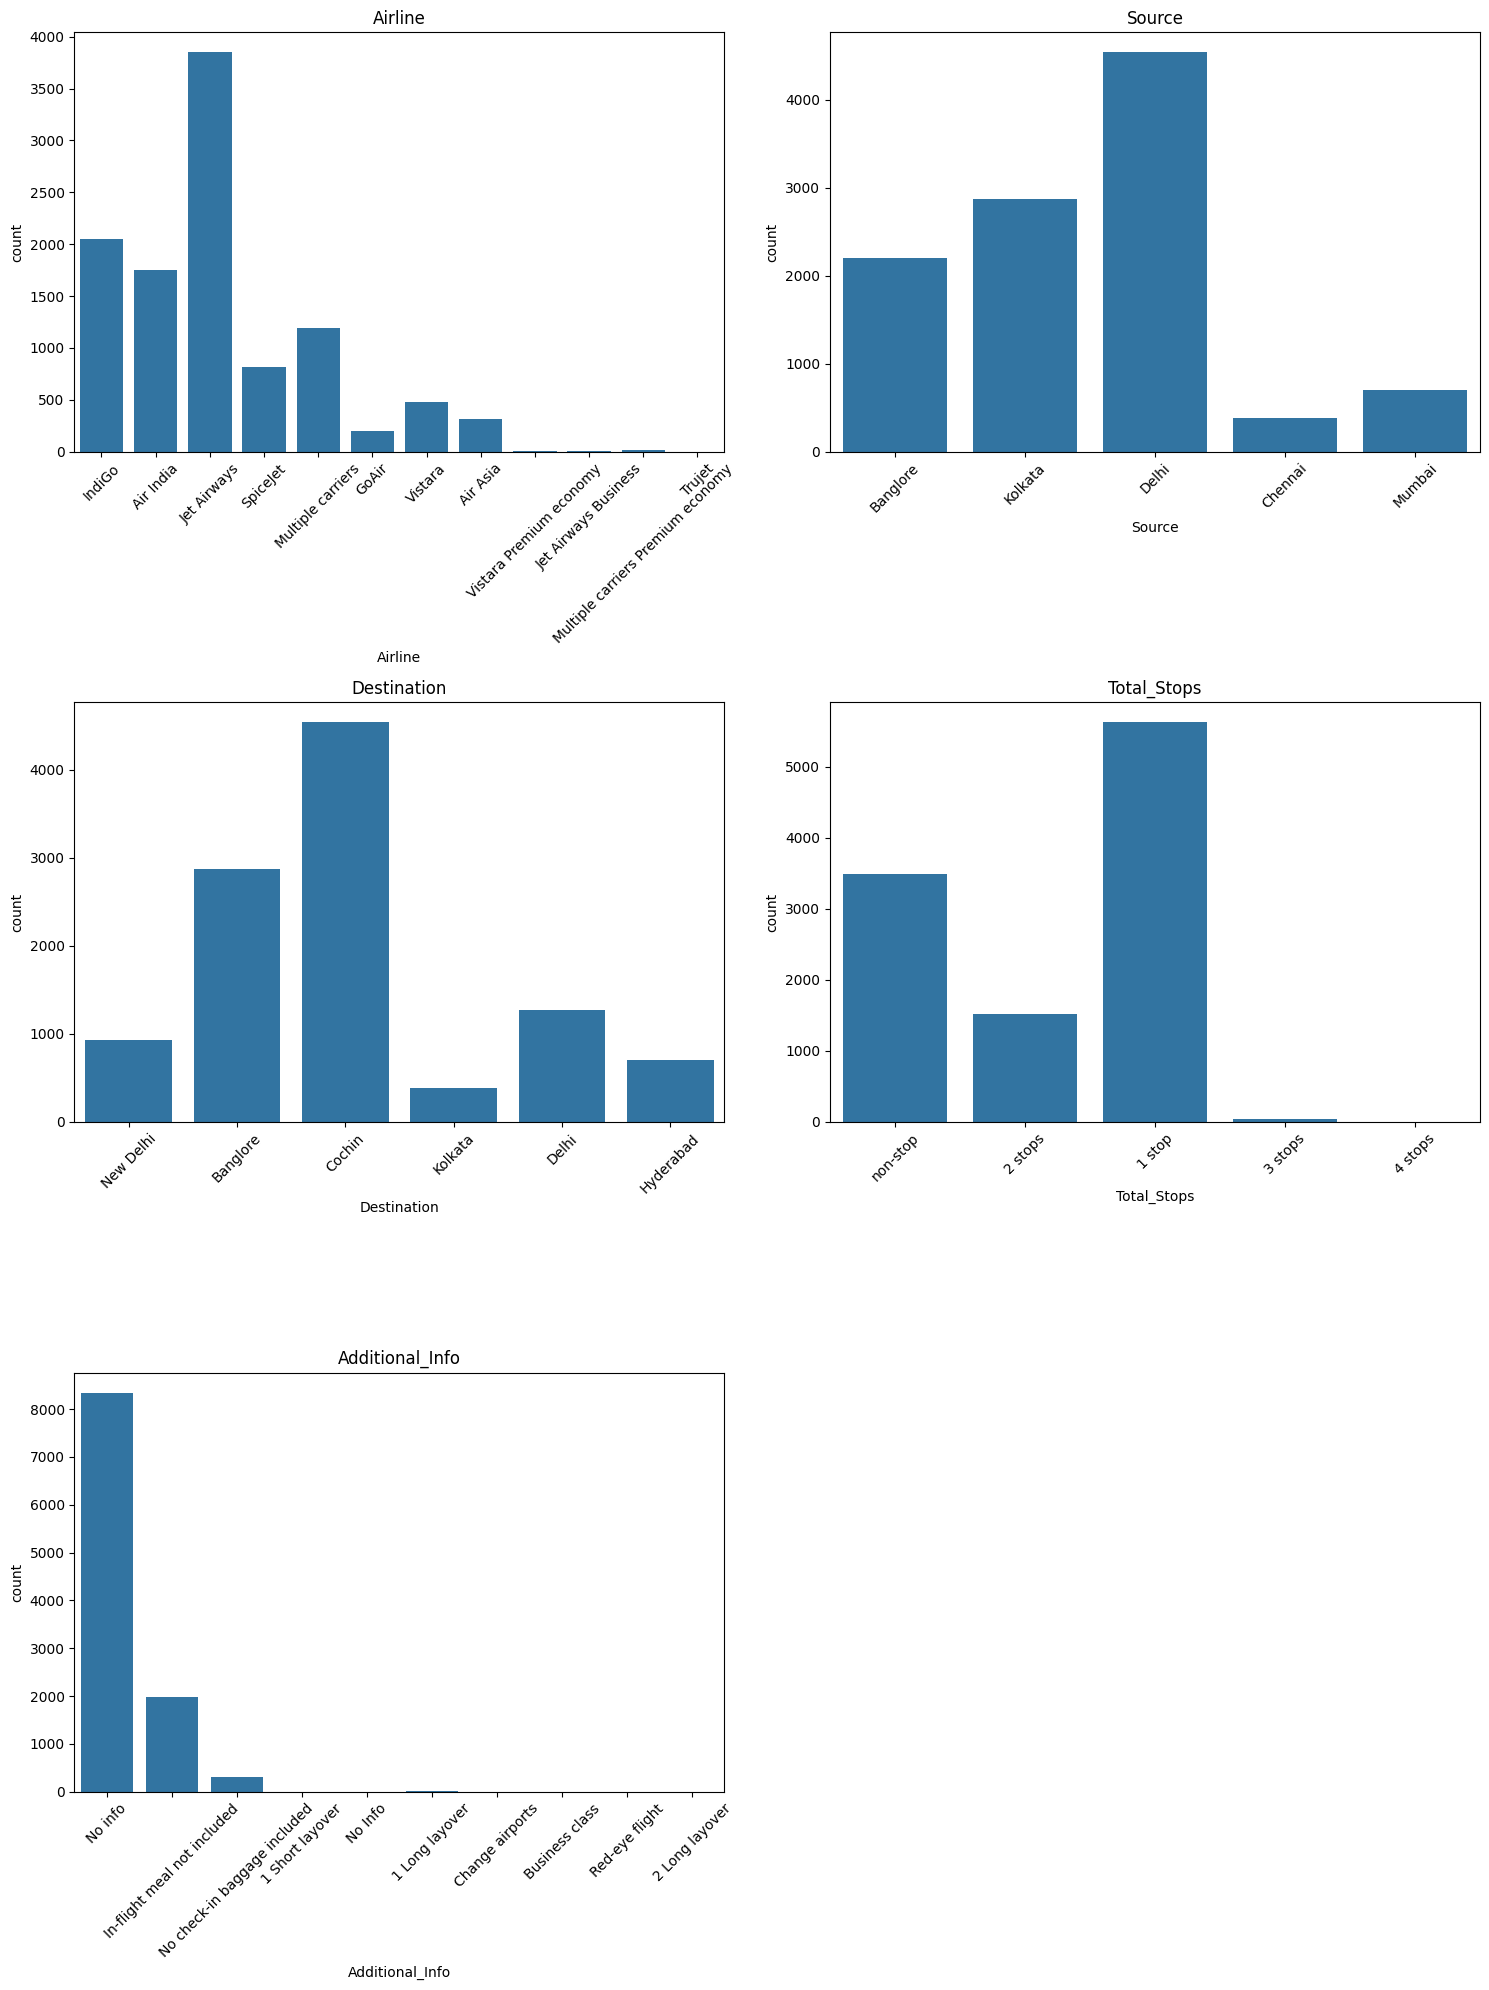

In [9]:
t=1
plt.figure(figsize=(15,20))
for i in ['Airline','Source','Destination','Total_Stops','Additional_Info']:
    plt.subplot(3,2,t)
    sns.countplot(x=data_train[i])
    plt.xticks(rotation=45)
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

Key Observations:

Top 3 flights are Jet Airways, Indigo,Air India
Top 3 Source are Delhi, Kolkata, Bengaluru
There is duplicate category in Designation (Delhi and New Delhi)
There is duplicate category in Additional_Info (No info and No Info)


In [10]:
# Lets explore routes

data_train['Route'].value_counts().head(5).sum()

6252

In [11]:
6252/data_train.shape[0]

0.5852288682954226

<Axes: xlabel='Route'>

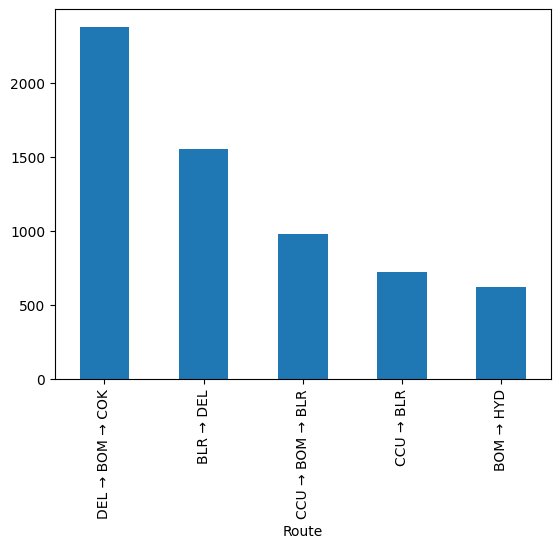

In [12]:
data_train['Route'].value_counts().head(5).plot(kind='bar')

<Axes: ylabel='count'>

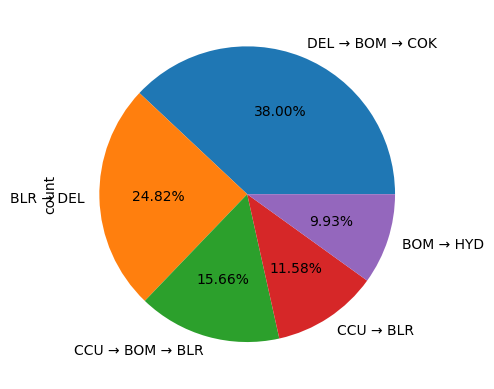

In [13]:
data_train['Route'].value_counts().head(5).plot(kind='pie',autopct='%.2f%%')

In [14]:
# Lets explore the price columns

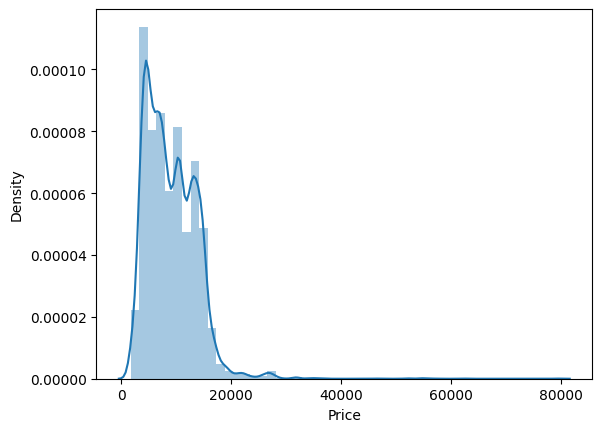

In [15]:
sns.distplot(data_train['Price'])
plt.show()

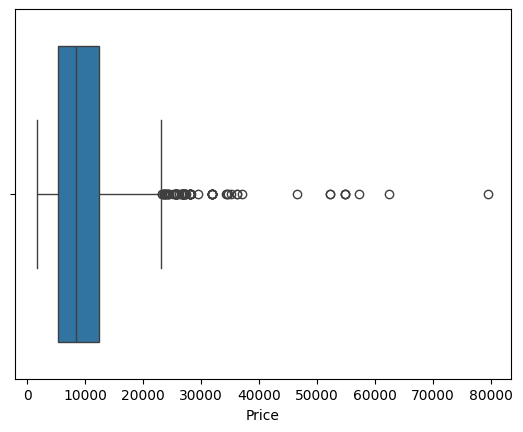

In [16]:
# Check for outliers

sns.boxplot(data_train['Price'],orient='h')
plt.show()

Inferences : 

1. There is one record is missing in Route and Total Stops 
2. There is 12 unique Airline and Jet Airways is more frequent.
3. Most of the airlines source is Delhi and designation is cochin
4. The most frequent route is Delhi- bombay-Cochin
5. Most of the flights have 1 route

Key Observations:

Top 3 flights are Jet Airways, Indigo,Air India
Top 3 Source are Delhi, Kolkata, Bengaluru
There is duplicate category in Designation (Delhi and New Delhi)
There is duplicate category in Additional_Info (No info and No Info)
Top 5 routes have 60% of data


### Bivariate Analysis 

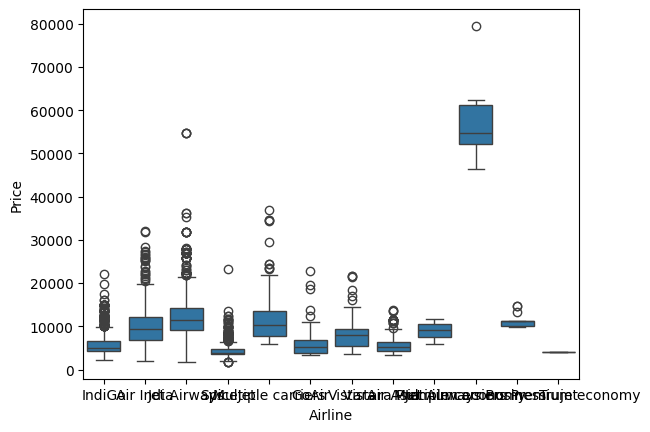

In [17]:
# Lets explore effect of airline in price

sns.boxplot(x=data_train['Airline'],y=data_train['Price'])
plt.show()
                         
            

In [18]:
# Airline vs Price (Annova Test, Krsukal wallis)

In [19]:
# Assumption: The data comes from normal distribution
from scipy.stats import shapiro,jarque_bera,kruskal

In [20]:
# H0: Data is normal
# Ha: Data is not normal

shapiro(data_train['Price'])

ShapiroResult(statistic=0.8955856561660767, pvalue=0.0)

In [21]:
jarque_bera(data_train['Price'])

SignificanceResult(statistic=84545.14317610116, pvalue=0.0)

In [22]:
data_train['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [23]:
# The data is not normal we should go with non parametric kruaskal test

# H0: Airline has no effect on Price
# Ha: Atleast one airline has different price


s1 = data_train[data_train['Airline']=='IndiGo']['Price']
s2 = data_train[data_train['Airline']=='Air India']['Price']
s3 = data_train[data_train['Airline']=='Jet Airways']['Price']
s4 = data_train[data_train['Airline']=='SpiceJet']['Price']
s5 = data_train[data_train['Airline']=='Multiple carriers']['Price']
s6 = data_train[data_train['Airline']=='GoAir']['Price']
s7 = data_train[data_train['Airline']=='Vistara']['Price']
s8 = data_train[data_train['Airline']=='Air Asia']['Price']
s9 = data_train[data_train['Airline']=='Vistara Premium economy']['Price']
s10 = data_train[data_train['Airline']=='Jet Airways Business']['Price']
s11 = data_train[data_train['Airline']=='Multiple carriers Premium economy']['Price']
s12 = data_train[data_train['Airline']=='Trujet']['Price']



In [24]:
kruskal(s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12)

KruskalResult(statistic=4870.593769019019, pvalue=0.0)

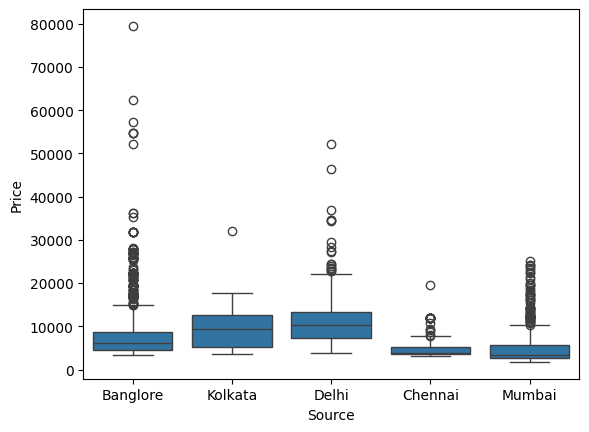

In [25]:
# Lets explore effect of source on price

sns.boxplot(x=data_train['Source'],y=data_train['Price'])
plt.show()
           

In [26]:
# Lets proof this fact statistically

data_train['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [27]:
sample=[]
for i in ['non-stop', '2 stops', '1 stop', '3 stops', '4 stops']:
    s=data_train[data_train['Total_Stops']==i]['Price']
    sample.append(s)

In [28]:
# H0: Total Stop has no effect on Price
# Ha: Total Stop one airline has different price

kruskal(sample[0],sample[1],sample[2],sample[3])

KruskalResult(statistic=5749.236822864575, pvalue=0.0)

In [29]:
# atleast one category has effect on target variable

Inference:

1. Flight price is affected by Airline and Total Stop

### Data Preprocessing

In [30]:
# Combine the dataset

data=pd.concat([data_train,data_test],axis=0)

In [31]:
data.shape

(13354, 11)

In [32]:
# Treat the missing value

data.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [33]:
data[data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


In [34]:
# there is only one row which is missing so we can drop that row

data.drop(index=9039,inplace=True)

In [35]:
data.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
dtype: int64

In [36]:
# Treat the outliers

# There are outliers in price but we decide to keep the outliers in data as it seems to be genuine

In [37]:
data['Price'].max()

79512.0

In [38]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [39]:
data[data['Price']==data['Price'].max()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512.0


### Feature Engineering

* Generates some new features using the existing ones.
* Encoding category columns

In [40]:
data['Airline'].value_counts()

Airline
Jet Airways                          4746
IndiGo                               2564
Air India                            2191
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: count, dtype: int64

In [41]:
freq=data['Airline'].value_counts(normalize=True).to_dict()

airline_map=data_train['Airline'].value_counts(normalize=True).to_dict()

In [42]:
data['Airline']=data['Airline'].map(airline_map)

In [43]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0.192174,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,0.163999,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,0.360292,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,0.192174,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,0.192174,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,0.163999,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,0.192174,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,0.360292,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,0.163999,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [44]:
# Date of journey

data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'],format='%d/%m/%Y')

In [45]:
data.dtypes

Airline                   float64
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                     float64
dtype: object

In [46]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0.192174,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,0.163999,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,0.360292,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,0.192174,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,0.192174,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,0.163999,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,0.192174,2019-03-27,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,0.360292,2019-03-06,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,0.163999,2019-03-06,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [47]:
data['Day_of_Journey']=data['Date_of_Journey'].dt.day
data['Month_of_Journey']=data['Date_of_Journey'].dt.month
data['Weekday_of_Journey']=data['Date_of_Journey'].dt.weekday

In [48]:
data.drop(columns='Date_of_Journey',inplace=True)

In [49]:
data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Weekday_of_Journey
0,0.192174,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,6
1,0.163999,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2
2,0.360292,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,6
3,0.192174,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,6
4,0.192174,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,0.163999,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,6,6,3
2667,0.192174,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,3,2
2668,0.360292,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,6,3,2
2669,0.163999,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,3,2


### # Source and Destination 

In [50]:
data['Source'].value_counts()

Source
Delhi       5681
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: count, dtype: int64

In [51]:
data['Destination'].value_counts()

Destination
Cochin       5681
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: count, dtype: int64

In [52]:
data['Destination']=data['Destination'].replace('New Delhi','Delhi')

In [53]:
data['Source_to_Destination']=data['Source']+'-'+data['Destination']

In [54]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Weekday_of_Journey,Source_to_Destination
0,0.192174,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,6,Banglore-Delhi
1,0.163999,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2,Kolkata-Banglore
2,0.360292,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,6,Delhi-Cochin
3,0.192174,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,6,Kolkata-Banglore
4,0.192174,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,4,Banglore-Delhi


In [55]:
map_sd=data[data['Price'].notnull()]['Source_to_Destination'].value_counts(normalize=True).to_dict()

In [56]:
data['Source_to_Destination']=data['Source_to_Destination'].map(map_sd)

In [57]:
data.drop(columns=['Source','Destination'],inplace=True)

There are same value 

In [58]:
data.head(5)

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Weekday_of_Journey,Source_to_Destination
0,0.192174,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,6,0.205673
1,0.163999,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2,0.268770
2,0.360292,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,6,0.424640
3,0.192174,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,6,0.268770
4,0.192174,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,4,0.205673


### Route

In [59]:
busy_routes=data_train['Route'].value_counts().head(5).index

In [60]:
busy_routes

Index(['DEL → BOM → COK', 'BLR → DEL', 'CCU → BOM → BLR', 'CCU → BLR',
       'BOM → HYD'],
      dtype='object', name='Route')

In [61]:
data['Route']=data['Route'].apply(lambda x: 1 if x in busy_routes else 0)

In [62]:
data.head()

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Weekday_of_Journey,Source_to_Destination
0,0.192174,1,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,6,0.205673
1,0.163999,0,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2,0.268770
2,0.360292,0,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,6,0.424640
3,0.192174,0,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,6,0.268770
4,0.192174,0,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,4,0.205673


### Departure Time and Arrival Time 

In [63]:
data['Dep_Time']=data['Dep_Time'].str.split(':',expand=True)[0].astype(int)

In [64]:
data['Arrival_Time']=data['Arrival_Time'].str.split(':',expand=True)[0].astype(int)

In [65]:
data.head(5)

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Weekday_of_Journey,Source_to_Destination
0,0.192174,1,22,1,2h 50m,non-stop,No info,3897.0,24,3,6,0.205673
1,0.163999,0,5,13,7h 25m,2 stops,No info,7662.0,1,5,2,0.268770
2,0.360292,0,9,4,19h,2 stops,No info,13882.0,9,6,6,0.424640
3,0.192174,0,18,23,5h 25m,1 stop,No info,6218.0,12,5,6,0.268770
4,0.192174,0,16,21,4h 45m,1 stop,No info,13302.0,1,3,4,0.205673


In [66]:
def hour_to_cat(h):
    if h<=4:
        return 5
    elif h<=8:
        return 0
    elif h<=12:
        return 1
    elif h<=16:
        return 2
    elif h<=20:
        return 3
    else:
        return 4

In [67]:
data['Dep_Time']=data['Dep_Time'].apply(hour_to_cat)
data['Arrival_Time']=data['Arrival_Time'].apply(hour_to_cat)

In [68]:
data.head(5)

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Weekday_of_Journey,Source_to_Destination
0,0.192174,1,4,5,2h 50m,non-stop,No info,3897.0,24,3,6,0.205673
1,0.163999,0,0,2,7h 25m,2 stops,No info,7662.0,1,5,2,0.268770
2,0.360292,0,1,5,19h,2 stops,No info,13882.0,9,6,6,0.424640
3,0.192174,0,3,4,5h 25m,1 stop,No info,6218.0,12,5,6,0.268770
4,0.192174,0,2,4,4h 45m,1 stop,No info,13302.0,1,3,4,0.205673


### Duration 

In [69]:
data[['Dur_h','Dur_m']]=data['Duration'].str.split(expand=True)

In [70]:
data

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Weekday_of_Journey,Source_to_Destination,Dur_h,Dur_m
0,0.192174,1,4,5,2h 50m,non-stop,No info,3897.0,24,3,6,0.205673,2h,50m
1,0.163999,0,0,2,7h 25m,2 stops,No info,7662.0,1,5,2,0.268770,7h,25m
2,0.360292,0,1,5,19h,2 stops,No info,13882.0,9,6,6,0.424640,19h,None
3,0.192174,0,3,4,5h 25m,1 stop,No info,6218.0,12,5,6,0.268770,5h,25m
4,0.192174,0,2,4,4h 45m,1 stop,No info,13302.0,1,3,4,0.205673,4h,45m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,0.163999,0,3,3,23h 55m,1 stop,No info,NaN,6,6,3,0.268770,23h,55m
2667,0.192174,1,2,2,2h 35m,non-stop,No info,NaN,27,3,2,0.268770,2h,35m
2668,0.360292,1,4,5,6h 35m,1 stop,No info,NaN,6,3,2,0.424640,6h,35m
2669,0.163999,1,5,3,15h 15m,1 stop,No info,NaN,6,3,2,0.424640,15h,15m


In [71]:
data['Dur_h'].unique()

array(['2h', '7h', '19h', '5h', '4h', '15h', '21h', '25h', '13h', '12h',
       '26h', '22h', '23h', '20h', '10h', '6h', '11h', '8h', '16h', '3h',
       '27h', '1h', '14h', '9h', '18h', '17h', '24h', '30h', '28h', '29h',
       '37h', '34h', '38h', '35h', '36h', '47h', '33h', '32h', '31h',
       '42h', '39h', '5m', '41h', '40h'], dtype=object)

In [72]:
data[data['Dur_h']=='5m']

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Weekday_of_Journey,Source_to_Destination,Dur_h,Dur_m
6474,0.163999,0,2,2,5m,2 stops,No info,17327.0,6,3,2,0.06525,5m,None
2660,0.163999,0,2,2,5m,2 stops,No info,NaN,12,3,1,0.06525,5m,None


In [73]:
data['Dur_h']=data['Dur_h'].str.rstrip('hm').astype(int)

In [74]:
data['Dur_m'].unique()

array(['50m', '25m', None, '45m', '30m', '5m', '15m', '35m', '10m', '20m',
       '55m', '40m'], dtype=object)

In [75]:
data['Dur_m'].fillna('0',inplace=True)

In [76]:
data.head(5)

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Weekday_of_Journey,Source_to_Destination,Dur_h,Dur_m
0,0.192174,1,4,5,2h 50m,non-stop,No info,3897.0,24,3,6,0.205673,2,50m
1,0.163999,0,0,2,7h 25m,2 stops,No info,7662.0,1,5,2,0.268770,7,25m
2,0.360292,0,1,5,19h,2 stops,No info,13882.0,9,6,6,0.424640,19,0
3,0.192174,0,3,4,5h 25m,1 stop,No info,6218.0,12,5,6,0.268770,5,25m
4,0.192174,0,2,4,4h 45m,1 stop,No info,13302.0,1,3,4,0.205673,4,45m


In [77]:
data['Dur_m']=data['Dur_m'].str.rstrip('m').astype(int)

In [78]:
data['Duration']=data['Dur_h']*60+data['Dur_m']

In [79]:
data.drop(columns=['Dur_h','Dur_m'],inplace=True)

In [80]:
data.head(5)

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Weekday_of_Journey,Source_to_Destination
0,0.192174,1,4,5,170,non-stop,No info,3897.0,24,3,6,0.205673
1,0.163999,0,0,2,445,2 stops,No info,7662.0,1,5,2,0.268770
2,0.360292,0,1,5,1140,2 stops,No info,13882.0,9,6,6,0.424640
3,0.192174,0,3,4,325,1 stop,No info,6218.0,12,5,6,0.268770
4,0.192174,0,2,4,285,1 stop,No info,13302.0,1,3,4,0.205673


### Total Stops

In [81]:
data['Total_Stops'].value_counts()

Total_Stops
1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: count, dtype: int64

In [82]:
data['Total_Stops']=data['Total_Stops'].str.split(expand=True)[0]

In [83]:
data['Total_Stops']=np.where(data['Total_Stops']=='non-stop','0',data['Total_Stops'])

In [84]:
data['Total_Stops']=data['Total_Stops'].astype(int)

In [85]:
data['Additional_Info']=data['Additional_Info'].apply(lambda x: 0 if x in ['No Info','No info'] else 1)

In [86]:
data.head(10)

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Weekday_of_Journey,Source_to_Destination
0,0.192174,1,4,5,170,0,0,3897.0,24,3,6,0.205673
1,0.163999,0,0,2,445,2,0,7662.0,1,5,2,0.268770
2,0.360292,0,1,5,1140,2,0,13882.0,9,6,6,0.424640
3,0.192174,0,3,4,325,1,0,6218.0,12,5,6,0.268770
4,0.192174,0,2,4,285,1,0,13302.0,1,3,4,0.205673
5,0.076570,1,1,1,145,0,0,3873.0,24,6,0,0.268770
6,0.360292,0,3,1,930,1,1,11087.0,12,3,1,0.205673
7,0.360292,0,0,0,1265,1,0,22270.0,1,3,4,0.205673
8,0.360292,0,0,1,1530,1,1,11087.0,12,3,1,0.205673
9,0.111954,1,1,3,470,1,0,8625.0,27,5,0,0.424640


In [86]:
data.dtypes

Airline                  float64
Route                      int64
Dep_Time                   int64
Arrival_Time               int64
Duration                   int32
Total_Stops                int32
Additional_Info            int64
Price                    float64
Day_of_Journey             int32
Month_of_Journey           int32
Weekday_of_Journey         int32
Source_to_Destination    float64
dtype: object

### Train Test split 

In [87]:
train_set=data[data['Price'].notnull()]
test_set=data[data['Price'].isnull()]

In [88]:
train_set

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Weekday_of_Journey,Source_to_Destination
0,0.192174,1,4,5,170,0,0,3897.0,24,3,6,0.205673
1,0.163999,0,0,2,445,2,0,7662.0,1,5,2,0.268770
2,0.360292,0,1,5,1140,2,0,13882.0,9,6,6,0.424640
3,0.192174,0,3,4,325,1,0,6218.0,12,5,6,0.268770
4,0.192174,0,2,4,285,1,0,13302.0,1,3,4,0.205673
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.029861,1,3,4,150,0,0,4107.0,9,4,1,0.268770
10679,0.163999,1,3,4,155,0,0,4145.0,27,4,5,0.268770
10680,0.360292,1,0,1,180,0,0,7229.0,27,4,5,0.205673
10681,0.044838,1,1,2,160,0,0,12648.0,1,3,4,0.205673


In [89]:
test_set.drop(columns=['Price'],inplace=True)
test_set

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Weekday_of_Journey,Source_to_Destination
0,0.360292,1,3,5,655,1,0,6,6,3,0.424640
1,0.192174,0,0,1,240,1,0,12,5,6,0.268770
2,0.360292,1,3,3,1425,1,1,21,5,1,0.424640
3,0.111954,1,0,4,780,1,0,21,5,1,0.424640
4,0.029861,1,4,5,170,0,0,24,6,0,0.205673
...,...,...,...,...,...,...,...,...,...,...,...
2666,0.163999,0,3,3,1435,1,0,6,6,3,0.268770
2667,0.192174,1,2,2,155,0,0,27,3,2,0.268770
2668,0.360292,1,4,5,395,1,0,6,3,2,0.424640
2669,0.163999,1,5,3,915,1,0,6,3,2,0.424640


In [90]:
# Train test split on train_set

from sklearn.model_selection import train_test_split

In [91]:
y=train_set['Price']
x=train_set.drop(columns='Price')

In [92]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=2)

In [93]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(8545, 11) (2137, 11) (8545,) (2137,)


###  Predective Modelling

In [94]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [95]:
def hack_eval(y_true,y_pred):
    scor=1 - np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean())
    return scor

In [96]:
r2=[]
ms_error=[]
rmse_errr=[]
map_error=[]
fit_model=[]
hack_score=[]

def model_evaluation(model,xtrain,ytrain,xtest,ytest):
    model=model
    model.fit(xtrain,ytrain)
    pred=model.predict(xtest)
    
    print('R2: ', r2_score(ytest,pred))
    print('MSE: ',mean_squared_error(ytest,pred))
    print('RMSE: ',np.sqrt(r2_score(ytest,pred)))
    print('MAPE: ',mean_absolute_percentage_error(ytest,pred))
    print('MAE: ',mean_absolute_error(ytest,pred))
    print('Hack Score: ', hack_eval(ytest,pred))
    
    inp=input('Do you want to save this model?  Y/N')
    if inp.lower()=='y':
        fit_model.append(str(model))
        r2.append(r2_score(ytest,pred))
        ms_error.append(mean_squared_error(ytest,pred))
        rmse_errr.append(np.sqrt(r2_score(ytest,pred)))
        map_error.append(mean_absolute_percentage_error(ytest,pred))
        hack_score.append(hack_eval(ytest,pred))

        global score_card

        score_card=pd.DataFrame({'model':fit_model,
                                'R2':r2,
                                'RMSE':rmse_errr,
                                'MAPE':map_error,
                                'Hack Score':hack_score})
    else:
        return 
          

### Linear Regression 

In [97]:
model_evaluation(LinearRegression(),xtrain,ytrain,xtest,ytest)

R2:  0.49605673287692165
MSE:  11209267.615819229
RMSE:  0.7043129509507273
MAPE:  0.2717233415748301
MAE:  2175.7390151852046
Hack Score:  0.8522775848215686
Do you want to save this model?  Y/Ny


In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
grid={'alpha': [0.5,1,1.5,2.0,2.5,3,5,6,9]}

In [100]:
gscv=GridSearchCV(estimator=Ridge(),param_grid=grid,scoring='r2',cv=5,verbose=3)

In [101]:
gscv.fit(xtrain,ytrain)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .........................alpha=0.5;, score=0.493 total time=   0.0s
[CV 2/5] END .........................alpha=0.5;, score=0.452 total time=   0.0s
[CV 3/5] END .........................alpha=0.5;, score=0.553 total time=   0.0s
[CV 4/5] END .........................alpha=0.5;, score=0.536 total time=   0.0s
[CV 5/5] END .........................alpha=0.5;, score=0.512 total time=   0.0s
[CV 1/5] END ...........................alpha=1;, score=0.493 total time=   0.0s
[CV 2/5] END ...........................alpha=1;, score=0.452 total time=   0.0s
[CV 3/5] END ...........................alpha=1;, score=0.553 total time=   0.0s
[CV 4/5] END ...........................alpha=1;, score=0.536 total time=   0.0s
[CV 5/5] END ...........................alpha=1;, score=0.512 total time=   0.0s
[CV 1/5] END .........................alpha=1.5;, score=0.493 total time=   0.0s
[CV 2/5] END .........................alpha=1.5;,

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.5, 1, 1.5, 2.0, 2.5, 3, 5, 6, 9]},
             scoring='r2', verbose=3)

In [102]:
model_evaluation(Ridge(alpha=1),xtrain,ytrain,xtest,ytest)

R2:  0.49600805728056163
MSE:  11210350.312665392
RMSE:  0.7042783947279383
MAPE:  0.27161466374415366
MAE:  2175.619507945149
Hack Score:  0.8335352336410464
Do you want to save this model?  Y/Ny


In [103]:
model_evaluation(Lasso(alpha=1),xtrain,ytrain,xtest,ytest)

R2:  0.49608915179655044
MSE:  11208546.518089302
RMSE:  0.7043359651448664
MAPE:  0.27164738612046074
MAE:  2175.3415364097214
Hack Score:  0.839421780495631
Do you want to save this model?  Y/Ny


### Decision Tree

In [104]:
grid={'max_depth': [5,6,7,8,9],
     'max_features':[7,8,9,11]}

In [105]:
gscv=GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=grid,scoring='r2',cv=3,verbose=3)

In [106]:
gscv.fit(xtrain,ytrain)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END .......max_depth=5, max_features=7;, score=0.708 total time=   0.0s
[CV 2/3] END .......max_depth=5, max_features=7;, score=0.605 total time=   0.0s
[CV 3/3] END .......max_depth=5, max_features=7;, score=0.615 total time=   0.0s
[CV 1/3] END .......max_depth=5, max_features=8;, score=0.710 total time=   0.0s
[CV 2/3] END .......max_depth=5, max_features=8;, score=0.661 total time=   0.0s
[CV 3/3] END .......max_depth=5, max_features=8;, score=0.657 total time=   0.0s
[CV 1/3] END .......max_depth=5, max_features=9;, score=0.730 total time=   0.0s
[CV 2/3] END .......max_depth=5, max_features=9;, score=0.596 total time=   0.0s
[CV 3/3] END .......max_depth=5, max_features=9;, score=0.649 total time=   0.0s
[CV 1/3] END ......max_depth=5, max_features=11;, score=0.731 total time=   0.0s
[CV 2/3] END ......max_depth=5, max_features=11;, score=0.669 total time=   0.0s
[CV 3/3] END ......max_depth=5, max_features=11;

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 6, 7, 8, 9],
                         'max_features': [7, 8, 9, 11]},
             scoring='r2', verbose=3)

In [107]:
gscv.best_params_

{'max_depth': 9, 'max_features': 11}

In [108]:
model_evaluation(DecisionTreeRegressor(**gscv.best_params_),xtrain,ytrain,xtest,ytest)

R2:  0.7876140797601403
MSE:  4724124.267780299
RMSE:  0.8874762418003878
MAPE:  0.12730038724742715
MAE:  1072.607957753249
Hack Score:  0.9182023077524799
Do you want to save this model?  Y/Ny


### Random Forest

In [109]:
grid={'n_estimators':[50,100,200,250,300],'max_depth':[7,8,9,10]}

In [110]:
gscv=GridSearchCV(RandomForestRegressor(),param_grid=grid,scoring='r2',cv=3,verbose=3)
gscv.fit(xtrain,ytrain)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END ......max_depth=7, n_estimators=50;, score=0.820 total time=   0.4s
[CV 2/3] END ......max_depth=7, n_estimators=50;, score=0.806 total time=   0.4s
[CV 3/3] END ......max_depth=7, n_estimators=50;, score=0.813 total time=   0.4s
[CV 1/3] END .....max_depth=7, n_estimators=100;, score=0.826 total time=   1.0s
[CV 2/3] END .....max_depth=7, n_estimators=100;, score=0.807 total time=   0.9s
[CV 3/3] END .....max_depth=7, n_estimators=100;, score=0.815 total time=   1.0s
[CV 1/3] END .....max_depth=7, n_estimators=200;, score=0.825 total time=   1.9s
[CV 2/3] END .....max_depth=7, n_estimators=200;, score=0.808 total time=   1.2s
[CV 3/3] END .....max_depth=7, n_estimators=200;, score=0.818 total time=   1.0s
[CV 1/3] END .....max_depth=7, n_estimators=250;, score=0.820 total time=   1.3s
[CV 2/3] END .....max_depth=7, n_estimators=250;, score=0.808 total time=   1.3s
[CV 3/3] END .....max_depth=7, n_estimators=250;

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [7, 8, 9, 10],
                         'n_estimators': [50, 100, 200, 250, 300]},
             scoring='r2', verbose=3)

In [111]:
model_evaluation(RandomForestRegressor(**gscv.best_params_),xtrain,ytrain,xtest,ytest)

R2:  0.8436161739311409
MSE:  3478463.2944871676
RMSE:  0.918485804969865
MAPE:  0.09904237428360516
MAE:  889.6472216956862
Hack Score:  0.9339952344084814
Do you want to save this model?  Y/Ny


### Ada boost 

In [112]:
model_evaluation(AdaBoostRegressor(estimator=RandomForestRegressor(max_depth=7,max_features=7)),xtrain,ytrain,xtest,ytest)

R2:  0.8056584958506552
MSE:  4322760.260906137
RMSE:  0.8975848126225483
MAPE:  0.18000492831168924
MAE:  1415.644901926655
Hack Score:  0.9059399094594753
Do you want to save this model?  Y/Ny


### Gradient boosting 

In [113]:
model_evaluation(GradientBoostingRegressor(max_depth=7,n_estimators=100),xtrain,ytrain,xtest,ytest)

R2:  0.8764747606883129
MSE:  2747585.998434714
RMSE:  0.9362023075640825
MAPE:  0.09494497975173931
MAE:  817.1417194333785
Hack Score:  0.9386761584960421
Do you want to save this model?  Y/Ny


In [114]:
score_card

,model,R2,RMSE,MAPE,Hack Score
0,LinearRegression(),0.496057,0.704313,0.271723,0.852278
1,Ridge(alpha=1),0.496008,0.704278,0.271615,0.833535
2,Lasso(alpha=1),0.496089,0.704336,0.271647,0.839422
3,"DecisionTreeRegressor(max_depth=9, max_feature...",0.787614,0.887476,0.127300,0.918202
4,"RandomForestRegressor(max_depth=10, n_estimato...",0.843616,0.918486,0.099042,0.933995
5,AdaBoostRegressor(estimator=RandomForestRegres...,0.805658,0.897585,0.180005,0.905940
6,GradientBoostingRegressor(max_depth=7),0.876475,0.936202,0.094945,0.938676


### XG Boost

In [115]:
model_evaluation(XGBRegressor(n_estimator=200,max_depth=10),xtrain,ytrain,xtest,ytest)

R2:  0.8763670141400004
MSE:  2749982.617208114
RMSE:  0.9361447613163257
MAPE:  0.08011445433996339
MAE:  720.6606040315535
Hack Score:  0.940384282682033
Do you want to save this model?  Y/Ny


In [116]:
score_card

,model,R2,RMSE,MAPE,Hack Score
0,LinearRegression(),0.496057,0.704313,0.271723,0.852278
1,Ridge(alpha=1),0.496008,0.704278,0.271615,0.833535
2,Lasso(alpha=1),0.496089,0.704336,0.271647,0.839422
3,"DecisionTreeRegressor(max_depth=9, max_feature...",0.787614,0.887476,0.127300,0.918202
4,"RandomForestRegressor(max_depth=10, n_estimato...",0.843616,0.918486,0.099042,0.933995
5,AdaBoostRegressor(estimator=RandomForestRegres...,0.805658,0.897585,0.180005,0.905940
6,GradientBoostingRegressor(max_depth=7),0.876475,0.936202,0.094945,0.938676
7,"XGBRegressor(base_score=None, booster=None, ca...",0.876367,0.936145,0.080114,0.940384


### Voting 

In [117]:
base_models=[('DT',DecisionTreeRegressor(max_depth=10,max_features=9)),
            ('RF',RandomForestRegressor(n_estimators=100,max_depth=9)),
            ('GBR',GradientBoostingRegressor(max_depth=7,n_estimators=130)),
            ('XGB',XGBRegressor(max_depth=8,n_estimators=130))]

In [118]:
model_evaluation(VotingRegressor(base_models),xtrain,ytrain,xtest,ytest)

R2:  0.8727245645403432
MSE:  2831002.0394394645
RMSE:  0.9341972835222457
MAPE:  0.09254853496608424
MAE:  805.7141820735905
Hack Score:  0.9383835910712998
Do you want to save this model?  Y/Ny


### Stacking 

In [119]:
base_models=[('DT 1',DecisionTreeRegressor(max_depth=10,max_features=9)),
             ('DT 2',DecisionTreeRegressor(max_depth=9)),
            ('RF 1',RandomForestRegressor(n_estimators=100,max_depth=9)),
             ('RF 2',RandomForestRegressor(n_estimators=130,max_depth=8)),
            ('GBR',GradientBoostingRegressor(max_depth=7,n_estimators=130)),
            ('XGB',XGBRegressor(max_depth=8,n_estimators=130))]

In [120]:
model_evaluation(StackingRegressor(estimators=base_models),xtrain,ytrain,xtest,ytest)

R2:  0.8821600490949373
MSE:  2621127.479429631
RMSE:  0.9392337563646961
MAPE:  0.08316795908048434
MAE:  737.1795900784157
Hack Score:  0.9415351111826231
Do you want to save this model?  Y/Ny


In [121]:
model_evaluation(StackingRegressor(estimators=base_models,final_estimator=DecisionTreeRegressor(max_depth=5)),xtrain,ytrain,xtest,ytest)

R2:  0.8616681413697242
MSE:  3076931.322115928
RMSE:  0.9282608153798825
MAPE:  0.09025570549597685
MAE:  818.4155045038909
Hack Score:  0.9399401222920001
Do you want to save this model?  Y/Ny


In [122]:
score_card

,model,R2,RMSE,MAPE,Hack Score
0,LinearRegression(),0.496057,0.704313,0.271723,0.852278
1,Ridge(alpha=1),0.496008,0.704278,0.271615,0.833535
2,Lasso(alpha=1),0.496089,0.704336,0.271647,0.839422
3,"DecisionTreeRegressor(max_depth=9, max_feature...",0.787614,0.887476,0.127300,0.918202
4,"RandomForestRegressor(max_depth=10, n_estimato...",0.843616,0.918486,0.099042,0.933995
5,AdaBoostRegressor(estimator=RandomForestRegres...,0.805658,0.897585,0.180005,0.905940
6,GradientBoostingRegressor(max_depth=7),0.876475,0.936202,0.094945,0.938676
7,"XGBRegressor(base_score=None, booster=None, ca...",0.876367,0.936145,0.080114,0.940384
8,"VotingRegressor(estimators=[('DT',\n ...",0.872725,0.934197,0.092549,0.938384
9,"StackingRegressor(estimators=[('DT 1',\n ...",0.882160,0.939234,0.083168,0.941535


### Lets tune XG Boost Regressor 

In [123]:
param_grid={'n_estimators':[100,120,130,150,170,180,190,200],
           'max_depth':[8,9,10,11,12],
           'gamma':[0,1,2]}

In [124]:
gscv=GridSearchCV(estimator=XGBRegressor(),param_grid=param_grid,scoring='r2',cv=5,verbose=3)

In [125]:
gscv.fit(xtrain,ytrain)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END gamma=0, max_depth=8, n_estimators=100;, score=0.882 total time=   0.2s
[CV 2/5] END gamma=0, max_depth=8, n_estimators=100;, score=0.882 total time=   0.2s
[CV 3/5] END gamma=0, max_depth=8, n_estimators=100;, score=0.882 total time=   0.1s
[CV 4/5] END gamma=0, max_depth=8, n_estimators=100;, score=0.852 total time=   0.2s
[CV 5/5] END gamma=0, max_depth=8, n_estimators=100;, score=0.871 total time=   0.1s
[CV 1/5] END gamma=0, max_depth=8, n_estimators=120;, score=0.882 total time=   0.3s
[CV 2/5] END gamma=0, max_depth=8, n_estimators=120;, score=0.882 total time=   0.2s
[CV 3/5] END gamma=0, max_depth=8, n_estimators=120;, score=0.880 total time=   0.1s
[CV 4/5] END gamma=0, max_depth=8, n_estimators=120;, score=0.852 total time=   0.1s
[CV 5/5] END gamma=0, max_depth=8, n_estimators=120;, score=0.871 total time=   0.1s
[CV 1/5] END gamma=0, max_depth=8, n_estimators=130;, score=0.882 total time=   0.2s
[C

[CV 2/5] END gamma=0, max_depth=10, n_estimators=150;, score=0.890 total time=   0.4s
[CV 3/5] END gamma=0, max_depth=10, n_estimators=150;, score=0.905 total time=   0.3s
[CV 4/5] END gamma=0, max_depth=10, n_estimators=150;, score=0.842 total time=   0.4s
[CV 5/5] END gamma=0, max_depth=10, n_estimators=150;, score=0.895 total time=   0.4s
[CV 1/5] END gamma=0, max_depth=10, n_estimators=170;, score=0.883 total time=   0.4s
[CV 2/5] END gamma=0, max_depth=10, n_estimators=170;, score=0.890 total time=   0.4s
[CV 3/5] END gamma=0, max_depth=10, n_estimators=170;, score=0.905 total time=   0.4s
[CV 4/5] END gamma=0, max_depth=10, n_estimators=170;, score=0.842 total time=   0.4s
[CV 5/5] END gamma=0, max_depth=10, n_estimators=170;, score=0.895 total time=   0.4s
[CV 1/5] END gamma=0, max_depth=10, n_estimators=180;, score=0.883 total time=   0.5s
[CV 2/5] END gamma=0, max_depth=10, n_estimators=180;, score=0.890 total time=   0.4s
[CV 3/5] END gamma=0, max_depth=10, n_estimators=180;,

[CV 3/5] END gamma=0, max_depth=12, n_estimators=190;, score=0.898 total time=   1.3s
[CV 4/5] END gamma=0, max_depth=12, n_estimators=190;, score=0.840 total time=   1.1s
[CV 5/5] END gamma=0, max_depth=12, n_estimators=190;, score=0.883 total time=   1.1s
[CV 1/5] END gamma=0, max_depth=12, n_estimators=200;, score=0.879 total time=   1.3s
[CV 2/5] END gamma=0, max_depth=12, n_estimators=200;, score=0.892 total time=   1.2s
[CV 3/5] END gamma=0, max_depth=12, n_estimators=200;, score=0.898 total time=   1.3s
[CV 4/5] END gamma=0, max_depth=12, n_estimators=200;, score=0.840 total time=   1.2s
[CV 5/5] END gamma=0, max_depth=12, n_estimators=200;, score=0.883 total time=   1.3s
[CV 1/5] END gamma=1, max_depth=8, n_estimators=100;, score=0.882 total time=   0.1s
[CV 2/5] END gamma=1, max_depth=8, n_estimators=100;, score=0.882 total time=   0.1s
[CV 3/5] END gamma=1, max_depth=8, n_estimators=100;, score=0.882 total time=   0.1s
[CV 4/5] END gamma=1, max_depth=8, n_estimators=100;, sco

[CV 5/5] END gamma=1, max_depth=10, n_estimators=120;, score=0.896 total time=   0.3s
[CV 1/5] END gamma=1, max_depth=10, n_estimators=130;, score=0.884 total time=   0.4s
[CV 2/5] END gamma=1, max_depth=10, n_estimators=130;, score=0.891 total time=   0.3s
[CV 3/5] END gamma=1, max_depth=10, n_estimators=130;, score=0.905 total time=   0.4s
[CV 4/5] END gamma=1, max_depth=10, n_estimators=130;, score=0.842 total time=   0.3s
[CV 5/5] END gamma=1, max_depth=10, n_estimators=130;, score=0.896 total time=   0.4s
[CV 1/5] END gamma=1, max_depth=10, n_estimators=150;, score=0.884 total time=   0.5s
[CV 2/5] END gamma=1, max_depth=10, n_estimators=150;, score=0.890 total time=   0.4s
[CV 3/5] END gamma=1, max_depth=10, n_estimators=150;, score=0.905 total time=   0.4s
[CV 4/5] END gamma=1, max_depth=10, n_estimators=150;, score=0.842 total time=   0.5s
[CV 5/5] END gamma=1, max_depth=10, n_estimators=150;, score=0.896 total time=   0.5s
[CV 1/5] END gamma=1, max_depth=10, n_estimators=170;,

[CV 1/5] END gamma=1, max_depth=12, n_estimators=180;, score=0.878 total time=   1.0s
[CV 2/5] END gamma=1, max_depth=12, n_estimators=180;, score=0.892 total time=   0.9s
[CV 3/5] END gamma=1, max_depth=12, n_estimators=180;, score=0.898 total time=   0.9s
[CV 4/5] END gamma=1, max_depth=12, n_estimators=180;, score=0.840 total time=   0.9s
[CV 5/5] END gamma=1, max_depth=12, n_estimators=180;, score=0.883 total time=   0.9s
[CV 1/5] END gamma=1, max_depth=12, n_estimators=190;, score=0.878 total time=   1.8s
[CV 2/5] END gamma=1, max_depth=12, n_estimators=190;, score=0.892 total time=   1.0s
[CV 3/5] END gamma=1, max_depth=12, n_estimators=190;, score=0.898 total time=   0.9s
[CV 4/5] END gamma=1, max_depth=12, n_estimators=190;, score=0.840 total time=   0.9s
[CV 5/5] END gamma=1, max_depth=12, n_estimators=190;, score=0.883 total time=   0.6s
[CV 1/5] END gamma=1, max_depth=12, n_estimators=200;, score=0.878 total time=   0.7s
[CV 2/5] END gamma=1, max_depth=12, n_estimators=200;,

[CV 3/5] END gamma=2, max_depth=10, n_estimators=100;, score=0.906 total time=   0.2s
[CV 4/5] END gamma=2, max_depth=10, n_estimators=100;, score=0.843 total time=   0.2s
[CV 5/5] END gamma=2, max_depth=10, n_estimators=100;, score=0.897 total time=   0.2s
[CV 1/5] END gamma=2, max_depth=10, n_estimators=120;, score=0.884 total time=   0.2s
[CV 2/5] END gamma=2, max_depth=10, n_estimators=120;, score=0.891 total time=   0.2s
[CV 3/5] END gamma=2, max_depth=10, n_estimators=120;, score=0.906 total time=   0.2s
[CV 4/5] END gamma=2, max_depth=10, n_estimators=120;, score=0.842 total time=   0.2s
[CV 5/5] END gamma=2, max_depth=10, n_estimators=120;, score=0.896 total time=   0.3s
[CV 1/5] END gamma=2, max_depth=10, n_estimators=130;, score=0.884 total time=   0.2s
[CV 2/5] END gamma=2, max_depth=10, n_estimators=130;, score=0.891 total time=   0.2s
[CV 3/5] END gamma=2, max_depth=10, n_estimators=130;, score=0.905 total time=   0.3s
[CV 4/5] END gamma=2, max_depth=10, n_estimators=130;,

[CV 4/5] END gamma=2, max_depth=12, n_estimators=150;, score=0.840 total time=   0.6s
[CV 5/5] END gamma=2, max_depth=12, n_estimators=150;, score=0.883 total time=   0.5s
[CV 1/5] END gamma=2, max_depth=12, n_estimators=170;, score=0.879 total time=   0.6s
[CV 2/5] END gamma=2, max_depth=12, n_estimators=170;, score=0.892 total time=   0.7s
[CV 3/5] END gamma=2, max_depth=12, n_estimators=170;, score=0.898 total time=   0.6s
[CV 4/5] END gamma=2, max_depth=12, n_estimators=170;, score=0.840 total time=   0.6s
[CV 5/5] END gamma=2, max_depth=12, n_estimators=170;, score=0.883 total time=   0.6s
[CV 1/5] END gamma=2, max_depth=12, n_estimators=180;, score=0.879 total time=   0.6s
[CV 2/5] END gamma=2, max_depth=12, n_estimators=180;, score=0.892 total time=   0.6s
[CV 3/5] END gamma=2, max_depth=12, n_estimators=180;, score=0.898 total time=   0.6s
[CV 4/5] END gamma=2, max_depth=12, n_estimators=180;, score=0.840 total time=   0.6s
[CV 5/5] END gamma=2, max_depth=12, n_estimators=180;,

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'gamma': [0, 1, 2], 'max_depth': [8, 9, 10, 11, 12],
                         'n_estimators': [100, 120, 130, 150, 170, 180, 190,
                                          200]},
             scoring='r2', verbose=3)

In [126]:
gscv.best_score_

0.8846321555036258

In [127]:
gscv.best_params_

{'gamma': 1, 'max_depth': 9, 'n_estimators': 100}

In [128]:
model_evaluation(XGBRegressor(**gscv.best_params_),xtrain,ytrain,xtest,ytest)

R2:  0.8842139522294941
MSE:  2575442.2775543286
RMSE:  0.9403265136267795
MAPE:  0.08145062168126169
MAE:  721.7979359892299
Hack Score:  0.940539890361854
Do you want to save this model?  Y/Ny


###  Fine tune Random Forest

In [129]:
grid={'n_estimators':[50,100,150,170,200],'max_depth':[9,10,11]}

In [130]:
gscv=GridSearchCV(estimator=RandomForestRegressor(),param_grid=grid,scoring='r2',cv=5,verbose=3)

In [131]:
gscv.fit(xtrain,ytrain)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ......max_depth=9, n_estimators=50;, score=0.863 total time=   0.3s
[CV 2/5] END ......max_depth=9, n_estimators=50;, score=0.838 total time=   0.3s
[CV 3/5] END ......max_depth=9, n_estimators=50;, score=0.849 total time=   0.3s
[CV 4/5] END ......max_depth=9, n_estimators=50;, score=0.807 total time=   0.4s
[CV 5/5] END ......max_depth=9, n_estimators=50;, score=0.845 total time=   0.4s
[CV 1/5] END .....max_depth=9, n_estimators=100;, score=0.864 total time=   0.7s
[CV 2/5] END .....max_depth=9, n_estimators=100;, score=0.847 total time=   0.9s
[CV 3/5] END .....max_depth=9, n_estimators=100;, score=0.853 total time=   1.0s
[CV 4/5] END .....max_depth=9, n_estimators=100;, score=0.809 total time=   1.0s
[CV 5/5] END .....max_depth=9, n_estimators=100;, score=0.851 total time=   0.8s
[CV 1/5] END .....max_depth=9, n_estimators=150;, score=0.863 total time=   1.6s
[CV 2/5] END .....max_depth=9, n_estimators=150;

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [9, 10, 11],
                         'n_estimators': [50, 100, 150, 170, 200]},
             scoring='r2', verbose=3)

In [132]:
gscv.best_score_

0.8571422518334204

In [133]:
gscv.best_params_

{'max_depth': 11, 'n_estimators': 100}

In [134]:
model_evaluation(RandomForestRegressor(**gscv.best_params_),xtrain,ytrain,xtest,ytest)

R2:  0.8499296042575784
MSE:  3338032.943057185
RMSE:  0.921916267487226
MAPE:  0.0937718688616822
MAE:  845.4260011323458
Hack Score:  0.9358445626088788
Do you want to save this model?  Y/Ny


In [135]:
score_card

,model,R2,RMSE,MAPE,Hack Score
0,LinearRegression(),0.496057,0.704313,0.271723,0.852278
1,Ridge(alpha=1),0.496008,0.704278,0.271615,0.833535
2,Lasso(alpha=1),0.496089,0.704336,0.271647,0.839422
3,"DecisionTreeRegressor(max_depth=9, max_feature...",0.787614,0.887476,0.127300,0.918202
4,"RandomForestRegressor(max_depth=10, n_estimato...",0.843616,0.918486,0.099042,0.933995
5,AdaBoostRegressor(estimator=RandomForestRegres...,0.805658,0.897585,0.180005,0.905940
6,GradientBoostingRegressor(max_depth=7),0.876475,0.936202,0.094945,0.938676
7,"XGBRegressor(base_score=None, booster=None, ca...",0.876367,0.936145,0.080114,0.940384
8,"VotingRegressor(estimators=[('DT',\n ...",0.872725,0.934197,0.092549,0.938384
9,"StackingRegressor(estimators=[('DT 1',\n ...",0.882160,0.939234,0.083168,0.941535


In [136]:
base_models=[('DT 1',DecisionTreeRegressor(max_depth=11)),
            ('RF 1',RandomForestRegressor(n_estimators=170,max_depth=11)),
            ('GBR',GradientBoostingRegressor(max_depth=9,n_estimators=130)),
            ('XGB',XGBRegressor(max_depth=8,n_estimators=130,gamma=1))]

In [137]:
model_evaluation(StackingRegressor(estimators=base_models),xtrain,ytrain,xtest,ytest)

R2:  0.8854493681846338
MSE:  2547962.7794412374
RMSE:  0.9409831922965648
MAPE:  0.07966166701415169
MAE:  713.273467864392
Hack Score:  0.9429333489025278
Do you want to save this model?  Y/Ny


In [138]:
score_card

,model,R2,RMSE,MAPE,Hack Score
0,LinearRegression(),0.496057,0.704313,0.271723,0.852278
1,Ridge(alpha=1),0.496008,0.704278,0.271615,0.833535
2,Lasso(alpha=1),0.496089,0.704336,0.271647,0.839422
3,"DecisionTreeRegressor(max_depth=9, max_feature...",0.787614,0.887476,0.127300,0.918202
4,"RandomForestRegressor(max_depth=10, n_estimato...",0.843616,0.918486,0.099042,0.933995
5,AdaBoostRegressor(estimator=RandomForestRegres...,0.805658,0.897585,0.180005,0.905940
6,GradientBoostingRegressor(max_depth=7),0.876475,0.936202,0.094945,0.938676
7,"XGBRegressor(base_score=None, booster=None, ca...",0.876367,0.936145,0.080114,0.940384
8,"VotingRegressor(estimators=[('DT',\n ...",0.872725,0.934197,0.092549,0.938384
9,"StackingRegressor(estimators=[('DT 1',\n ...",0.882160,0.939234,0.083168,0.941535


### Hackathon Submission 

In [139]:
data_submission

,Price
0,15998
1,16612
2,25572
3,25778
4,16934
...,...
2666,14046
2667,14086
2668,22720
2669,23544


In [140]:
final_model=StackingRegressor(estimators=base_models)

In [141]:
final_model.fit(x,y)

StackingRegressor(estimators=[('DT 1', DecisionTreeRegressor(max_depth=11)),
                              ('RF 1',
                               RandomForestRegressor(max_depth=11,
                                                     n_estimators=170)),
                              ('GBR',
                               GradientBoostingRegressor(max_depth=9,
                                                         n_estimators=130)),
                              ('XGB',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_st...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=8,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=130, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))])

In [142]:
final_pred=final_model.predict(test_set)

In [143]:
final_pred

array([14290.28169812,  4245.69021629, 13000.4517921 , ...,
       16754.41087272, 13711.24210254,  8165.36204842])

In [144]:
data_test.shape

(2671, 10)

In [145]:
test_set.shape

(2671, 11)

In [146]:
final_submission=pd.DataFrame({'Price':final_pred})

In [147]:
final_submission

,Price
0,14290.281698
1,4245.690216
2,13000.451792
3,11765.197579
4,3733.807282
...,...
2666,9609.559616
2667,4580.568975
2668,16754.410873
2669,13711.242103
